In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
sys.path.append(os.path.abspath('..'))

from src.utils import CONNECTION_DIR, DATA_FOLDERS, FILES, standardise_column_names

Use custom styling

In [32]:
plt.style.use('../assets/graphmel.mplstyle')

Load data

In [33]:
# PATIENT-LEVEL
patients = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[2], FILES[DATA_FOLDERS[2]]['patients']))
studies = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[0], FILES[DATA_FOLDERS[0]]['studies']))
# Fix encoding for 90+ patients
patients['age_at_treatment_start_in_years'] = \
    patients.age_at_treatment_start_in_years.apply(lambda a: 90 if a == '90 or older' else int(a))
    
progression = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[1],
                                        FILES[DATA_FOLDERS[1]]['progression']))
progression['pseudorecist'] = progression.pseudorecist.eq('NPD').mul(1)

blood = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[4], FILES[DATA_FOLDERS[4]]['blood']))
blood.rename(columns={feature: feature.replace('-', '_') for feature in blood.columns}, inplace=True)
# Listify immunotherapy type to create multi-feature encoding
blood['immuno_therapy_type'] = blood.immuno_therapy_type \
    .apply(lambda t: ['ipi', 'nivo'] if t == 'ipinivo' else [t])
    
lesions = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[4], FILES[DATA_FOLDERS[4]]['lesions']))
shape = pd.read_csv(os.path.join(CONNECTION_DIR + DATA_FOLDERS[4], FILES[DATA_FOLDERS[4]]['shape']),
                    index_col=0)
shape = standardise_column_names(shape)

In [24]:
patient_feats = ['sex', 'bmi', 'has_brain_mets', 'immuno_therapy_type', 'age_at_treatment_start_in_years',
                 'duration_treatment_in_days', 'n_imgs_before_treatment', 'n_imgs_after_treatment_start']

In [26]:
df = blood[blood.n_days_to_treatment_start == 0].merge(patients, on='gpcr_id', how='inner')
df[patient_feats]

,sex,bmi,has_brain_mets,immuno_therapy_type,age_at_treatment_start_in_years,duration_treatment_in_days,n_imgs_before_treatment,n_imgs_after_treatment_start
0,female,28.40,n,"[ipi, nivo]",68,63,2,5
1,female,19.61,n,[ipi],68,63,1,5
2,male,24.62,y,"[ipi, nivo]",43,49,1,1
3,female,20.87,y,[ipi],75,78,1,2
4,male,27.70,y,[pembro],77,231,0,1
...,...,...,...,...,...,...,...,...
119,female,19.59,n,"[ipi, nivo]",44,0,0,1
120,male,NaN,n,"[ipi, nivo]",73,20,1,0
121,male,27.17,n,[pembro],87,105,1,2
122,female,NaN,n,[pembro],80,489,1,4


In [34]:
lesions

,gpcr_id,study_name,roi_id,roi_name,lesion_label_id,pars_bodypart_petct,pars_region_petct,pars_subregion_petct,pars_laterality_petct,pars_classification_petct,pars_suspicious_prob_petct,vol_ccm,max_suv_val,mean_suv_val,min_suv_val,sd_suv_val,is_malignant,assigned_organ
0,34610002,pre-01,0,Muscles1,1,lower limb,muscles,upper leg group,right,suspicious,0.917086,1.00,5.58,3.37,2.36,0.92,True,other_lowerlimb
1,34610002,pre-01,1,Muscles2,2,lower limb,muscles,upper leg group,left,suspicious,0.814661,0.61,5.72,3.50,2.46,0.97,True,other_lowerlimb
2,34610002,pre-01,3,Anus1,4,abdomen,anus,not specified,not specified,benign,0.030120,1.59,2.77,2.23,2.01,0.21,False,other_abdomen
3,34610002,pre-01,4,LymphNodes1,5,abdomen,lymph nodes,inguinal / femoral,left,suspicious,0.918552,1.83,2.79,1.56,1.18,0.33,True,lymphnode_abdomen
4,34610002,pre-01,5,Anus2,6,abdomen,anus,not specified,not specified,benign,0.039106,6.53,3.53,2.34,2.01,0.30,False,other_abdomen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21203,34610150,post-04,23,Bones8,24,thorax,bones,spine,not specified,benign,0.053232,7.60,3.07,2.34,2.06,0.20,False,bones_thorax
21204,34610150,post-04,24,Stomach1,25,abdomen,stomach,cardia / fundus / body,not specified,benign,0.158413,55.99,4.32,2.58,2.03,0.41,False,other_abdomen
21205,34610150,post-04,25,Bones9,26,thorax,bones,spine,not specified,benign,0.028717,15.33,3.17,2.11,1.65,0.30,False,bones_thorax
21206,34610150,post-04,26,Heart1,27,thorax,heart,ventricle,left,benign,0.043089,94.94,7.29,4.07,3.06,0.68,False,other_thorax


<AxesSubplot:xlabel='duration_treatment_in_days', ylabel='survival_in_days'>

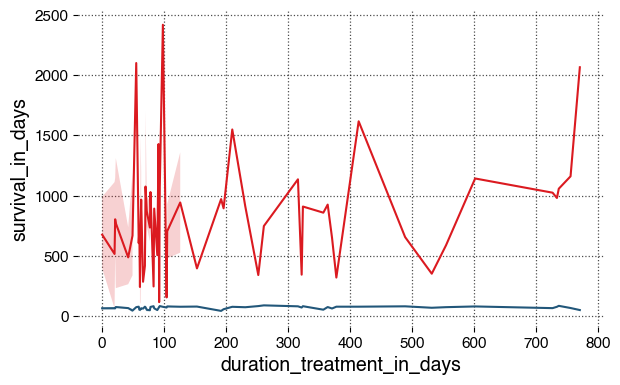

In [14]:
filename = '../report/figures/figure1.png'

# Set accurate dimensions for LaTeX report
golden_ratio = (5 ** 0.5 - 1) / 2
latex_width = 7.0  # in inches
fig.set_size_inches(latex_width, latex_width * golden_ratio)

plt.savefig(filename, bbox_extra_artists=(lgd,), bbox_inches='tight')